# Import library 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Membaca data .csv 

In [2]:
path='/automobileEDA.csv'
df = pd.read_csv(path)

# Menampilkan conton data yang paling atas

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Menampilkan jumlah data

In [4]:
len (df)

201

# Menampilkan judul tabel (fitur) yang ada di file .csv

In [5]:
print(df.columns.values)

['symboling' 'normalized-losses' 'make' 'aspiration' 'num-of-doors'
 'body-style' 'drive-wheels' 'engine-location' 'wheel-base' 'length'
 'width' 'height' 'curb-weight' 'engine-type' 'num-of-cylinders'
 'engine-size' 'fuel-system' 'bore' 'stroke' 'compression-ratio'
 'horsepower' 'peak-rpm' 'city-mpg' 'highway-mpg' 'price' 'city-L/100km'
 'horsepower-binned' 'diesel' 'gas']


#  Ekplorasi data dengan menampilkan plotting attribute 'engine-size' dan 'price' 

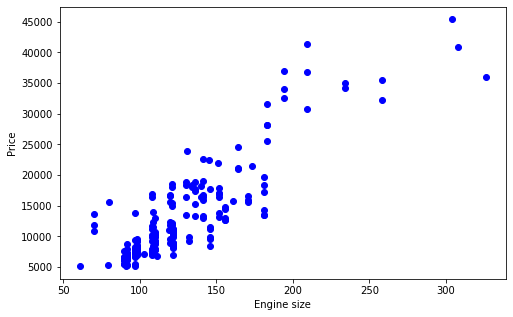

In [6]:
ez, prc = (df["engine-size"].values, df["price"].values)

plt.figure (figsize = (8, 5))
plt.plot(ez, prc, 'bo')
plt.ylabel("Price")
plt.xlabel("Engine size")
plt.show()

# Import library Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Mendeklarasikan library Linear Regression sebagai 'lm'
lm = LinearRegression()

# Menghitung Intercept (a) dan Slope (b), pada tabel 'Ukuran Mesin' (engine-size) dan 'Harga' (price)

In [12]:
# y = a + bx
# menghitung a (intercept) dan b (slope)

x_par = df[['engine-size']]
y_par = df['price']

lm.fit(x_par, y_par)
a = lm.intercept_
b = lm.coef_
print (a,b)

-7963.338906281042 [166.86001569]


# Implementasi Fungsi Regresi Linier (Linear Regression) 

In [13]:
# Membuat model persamaan linear y = a + bx
def model_linear(x, a, b) :
    ymodel = a + (b * x)
    return ymodel

In [14]:
# Menghitung nilai y_prediksi
y_prediksi = model_linear(x_par, a, b)

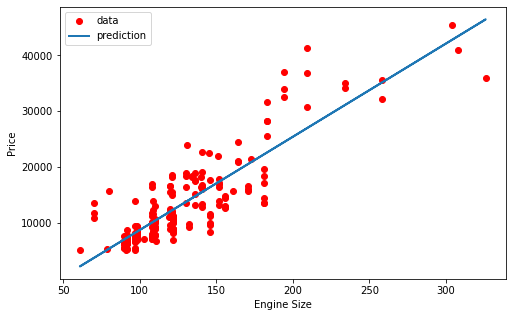

In [15]:
# Melakukan plotting data dan prediksi
plt.figure(figsize=(8,5))
plt.plot(ez, prc, 'ro', label='data')
plt.plot(ez, y_prediksi, linewidth=2.0, label='prediction')
plt.legend(loc='best')
plt.ylabel('Price')
plt.xlabel('Engine Size')
plt.show()

# Evaluasi akurasi model Regresi Linier (Linear Regression) 

In [16]:
# Evaluasi akurasi model regresi
# Menentukan data latih dan data uji secara acak (Split Test)
i = np.random.rand(len(df)) < 0.8
x_latih = x_par[i]
y_latih = prc[i]
x_uji = ez[~i]
y_uji = prc[~i]

In [17]:
# Menghitung a (intercept) dan b (slope) dari data latih
lm.fit(x_latih, y_latih)
a_latih = lm.intercept_
b_latih = lm.coef_
print (a_latih, b_latih)

-7554.154161310411 [163.64676321]


In [18]:
# Menghitung prediksi dari data uji
y_prediksi = model_linear(x_uji, a_latih, b_latih)

In [19]:
#menghitung MAE, MSE, dan RMSE
mae = np.mean(np.absolute(y_uji - y_prediksi))
mse = np.mean((y_uji - y_prediksi)**2)
rmse = np.sqrt(mse)

print("Mean Absolute Error = " + str(round(mae, 4)))
print("Mean Squared Error = " + str(round(mse, 4)))
print("Root Mean Squared Error = " + str(round(rmse, 4)))

Mean Absolute Error = 2546.3629
Mean Squared Error = 13139668.0872
Root Mean Squared Error = 3624.868


# Plotting grafik prediksi harga mobil ('price') dan ukuran mesin ('engine-size') 500 - 1000

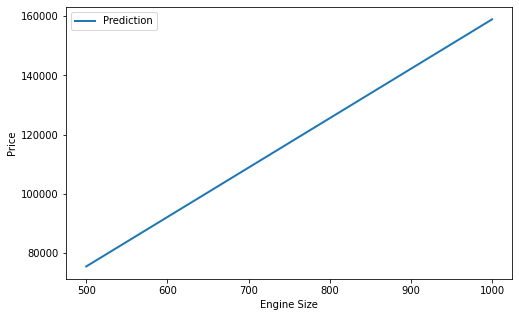

In [20]:
# Melakukan plotting data dan prediksi
xpoints = list(range(500, 1100, 100))
ypoints = model_linear(xpoints, a, b)

plt.figure(figsize=(8,5))
plt.plot(xpoints, ypoints, linewidth=2.0, label='Prediction')
plt.legend(loc='best')
plt.ylabel('Price')
plt.xlabel('Engine Size')
plt.show()